# Chapter 9: Plotting-and-Data-Visualization

In [ ]:
# Making informative visualizations (sometimes called plots) is one of the most important tasks in data analysis
    # Help identify outliers 
    # Needed data transformations, or 
    # As a way of generating ideas for models

In [ ]:
# Python has many add-on libraries for making static or dynamic visualizations, but 
# In this chapter of the book it is focused on mainly focused on matplotlib and libraries that build on top of it

In [1]:
# matplotlib is designed for creating (mostly two-dimensional) publication-quality plots.

In [ ]:
# The project was started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python. 
# The matplotlib and IPython communities have collaborated to simplify interactive plotting from 
# The IPython shell (and now, Jupyter notebook). 

In [ ]:
# Matplotlib supports various GUI backends on all operating systems and 
# additionally can export visualizations to all of the common vector and raster graphics formats 
# (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

# With the exception of a few diagrams, nearly all of the graphics in this book were produced using matplotlib

# The main libraries required to work with the plots are:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
%matplotlib inline

In [5]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

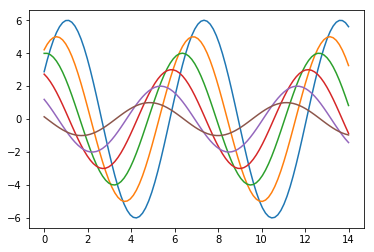

In [6]:
sinplot()

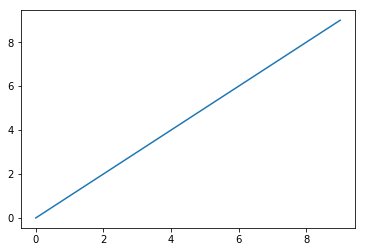

In [3]:
#plot
data = np.arange(10)
plt.plot(data)


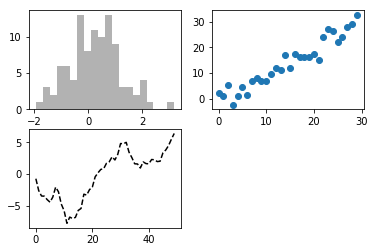

In [4]:
#create a new figure and three subplot
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
#create black dashed line on third subplot
plt.plot(randn(50).cumsum(), 'k--')
#plot histogram on first subplot
_ = ax1.hist(randn(100),bins=20,color='k',alpha=0.3)
#creat scatter on second subplot
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))


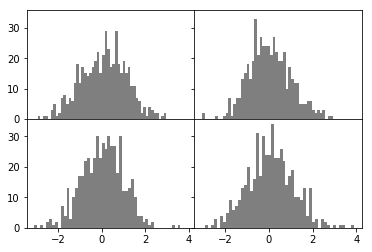

In [5]:
#Adjusting the spacing around subplots
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

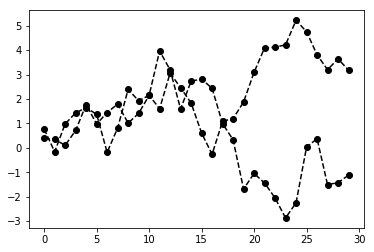

In [6]:
#Colors, Markers, and Line Styles
plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

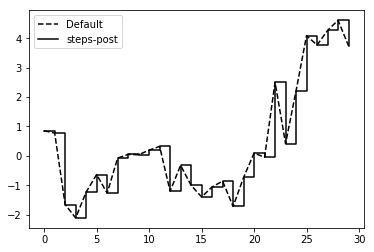

In [7]:
#dchange draw style
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

Text(0.5,0,'Stages')

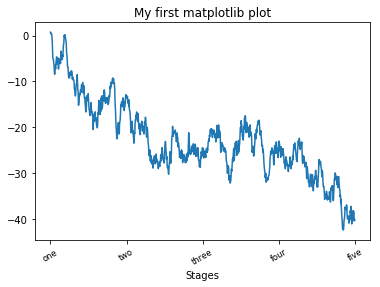

In [8]:
#Ticks, Labels, and Legends
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
#to change the x-axis ticks(the range of label to put),labels and plot title.
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(200,20,'Hello World!')

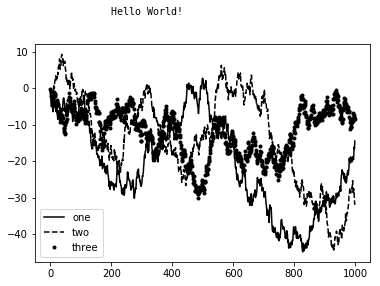

In [9]:
#Adding legends
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')
#Annotation
ax.text(200,20, 'Hello World!', family='monospace', fontsize=10)

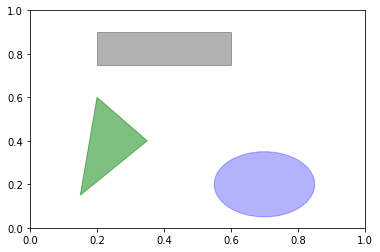

In [10]:
#Drawing on a Subplot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [36]:
#Saving Plots to File
#plt.savefig(myFigure.jpeg)
#Configuration
#plt.rc(myFigure.jpeg)


In [ ]:
#Plotting with pandas and seaborn

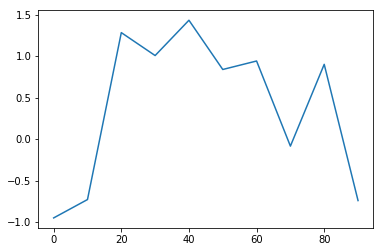

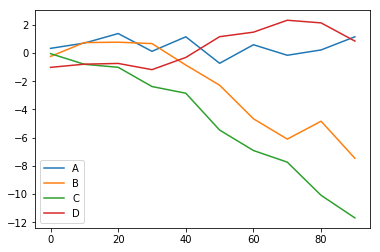

In [12]:
#Line Plots
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df.plot()

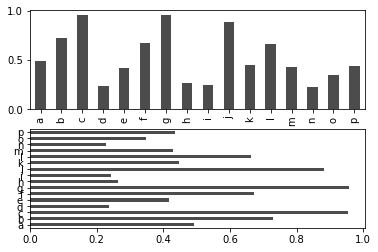

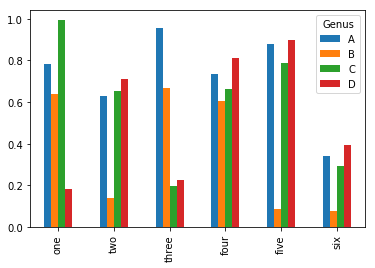

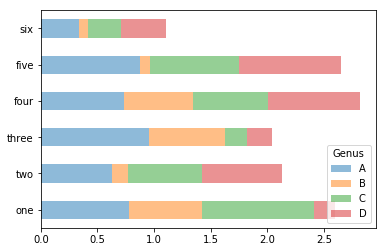

In [14]:
#Bar Plots
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

df = pd.DataFrame(np.random.rand(6, 4),index=['one', 'two', 'three', 'four', 'five', 'six'],columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5)



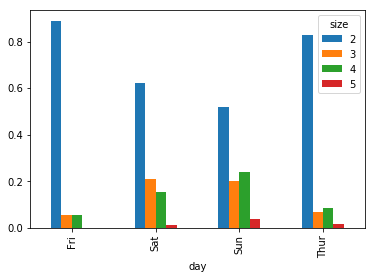

In [23]:
#Example 
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts.plot.bar()
#Party sizes increase in this chart



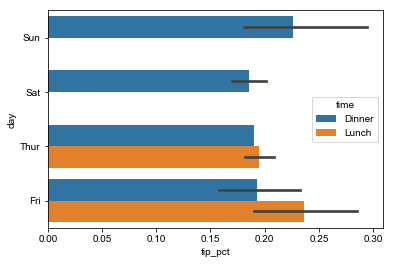

In [24]:
#seaborn to aggregate or summarize before making a plot
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style="whitegrid")

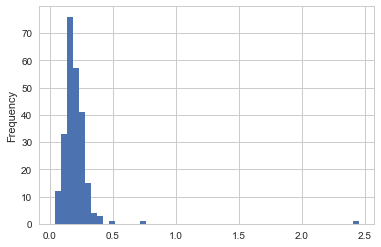

In [25]:
#Histograms and Density Plots
tips['tip_pct'].plot.hist(bins=50)


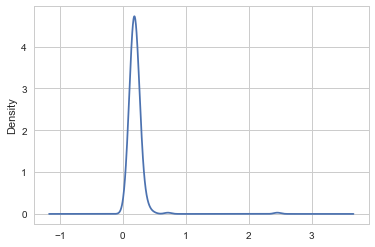

In [26]:
tips['tip_pct'].plot.density()

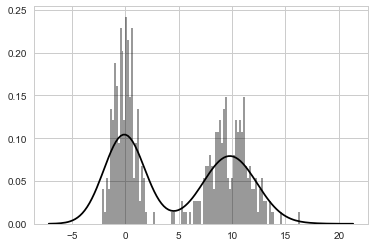

In [27]:
#plot both histogram and a continuous density
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

In [29]:
#Scatter or Point Plots
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 versus log unemp')

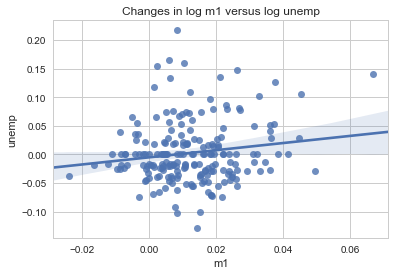

In [30]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

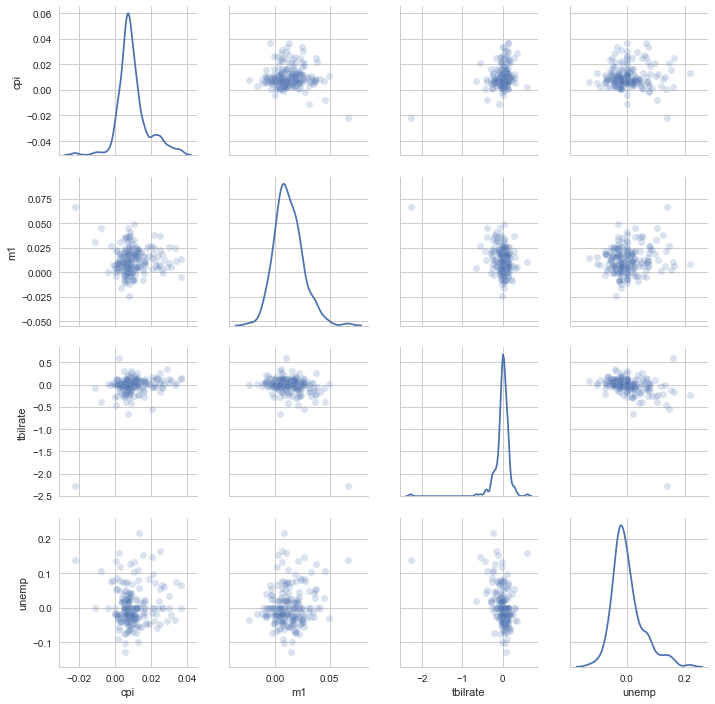

In [31]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

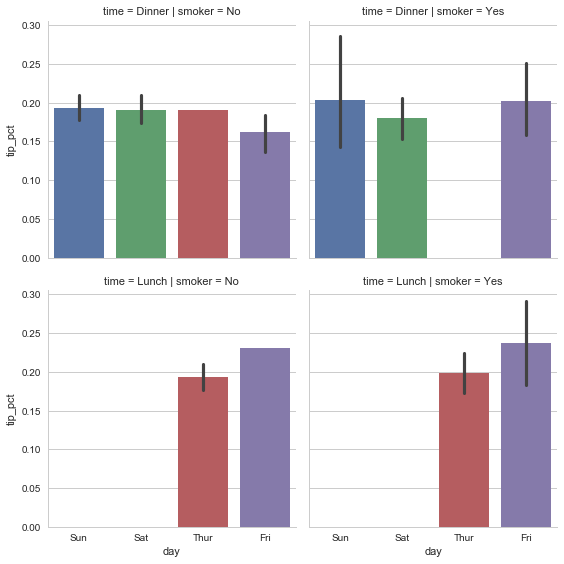

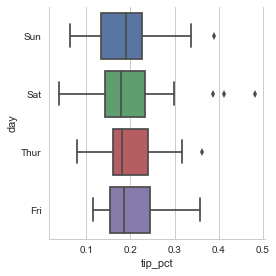

In [37]:
#Facet Grids and Categorical Data 
sns.factorplot(x='day', y='tip_pct', row='time',col='smoker',kind='bar', data=tips[tips.tip_pct < 1])
sns.factorplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])

In [39]:
#pd.to_datetime()
#x = pd.Series([1,2,3])

In [42]:
x = 1.0
#x.sin()
np.sin(x)

0.8414709848078965